In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import pandas as pd
from googleapiclient.discovery import build
from config.config import YOUTUBE_API_KEY
from api_methods import fetch_channel_stats, fetch_video_ids, fetch_video_details

In [99]:
# Get credentials and create an API client
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey = YOUTUBE_API_KEY)

In [100]:
# Channels to analyze
channel_ids = [
    "UC6OI7Crv96jgra5pwJNDFRQ", #Channel's name Sezen Aksu
    # Can add more channels
]

In [101]:
channel_stats = fetch_channel_stats(youtube, channel_ids)

In [102]:
channel_stats

channelName subscribers       views totalVideos                playlistId
0  Sezen Aksu     2570000  2826053191         748  UU6OI7Crv96jgra5pwJNDFRQ

In [103]:
channel_stats.loc

In [104]:
playlist_id = channel_stats.loc[channel_stats['channelName']== "Sezen Aksu", "playlistId"].iloc[0]

In [105]:
video_ids = fetch_video_ids(youtube, playlist_id)  # belirli bir Ã§alma listesine ait video id Ã§ekme iÅŸlemi gerÃ§ekleÅŸtirilecektir.

In [106]:
# Kanala ait video sayÄ±sÄ±
len(video_ids)

749

# Kanala ait videolarÄ±n detaylarÄ±

In [107]:
video_details = fetch_video_details(youtube, video_ids)

In [108]:
video_details.head(n=1)

video_id channelTitle  \
0  SwFG0k9ezHg   Sezen Aksu   

                                               title  \
0  Sezen Aksu - Gidiyorum #SezenAksu #MinikSerÃ§e ...   

                                         description  \
0  =============================\r\n\r\nSezen Aks...   

                                                tags           publishedAt  \
0  [sezen aksu, Turkish music, Turkish Pop Music,...  2023-12-03T17:00:17Z   

  viewCount likeCount favouriteCount commentCount duration definition caption  
0     22516      1346           None           40    PT49S         hd   false

En Ã§ok izlenme alan video'ya ait satÄ±rÄ± bulmaya Ã§alÄ±ÅŸalÄ±m.

Ã–ncelikle Null deÄŸer var mÄ± yok mu kontrol edelim

In [109]:
video_details.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [110]:
# NaN deÄŸerleri 0 sayÄ±sÄ± ile doldurma
fill_value = 0
video_details.fillna(fill_value, inplace=True)

In [111]:
# Kontrol edelim 
video_details.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags              False
publishedAt       False
viewCount         False
likeCount         False
favouriteCount    False
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [112]:
# ? integer a Ã§evirmeye Ã§alÄ±ÅŸ. Kolon tipi deÄŸiÅŸtirme
video_details.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount     int64
commentCount      object
duration          object
definition        object
caption           object
dtype: object

Kanal'Ä±n en Ã§ok izlenen videolarÄ±nÄ± inceleyelim.

In [113]:
# En Ã§ok izlenen videoya ait satÄ±rÄ± bulma
most_viewed = video_details.loc[video_details['viewCount'].astype(float).idxmax()]

# En Ã§ok izlenen videoya ait bilgiler
most_viewed_video_info = most_viewed[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# most_viewed_video_info deÄŸiÅŸkeni artÄ±k en Ã§ok izlenen videoya ait tÃ¼m bilgileri iÃ§erir
most_viewed_video_df = pd.DataFrame([most_viewed_video_info])
most_viewed_video_df.head()

video_id channelTitle  \
68  p4yxn8ZahPI   Sezen Aksu   

                                                title  \
68  Sezen Aksu - Ben De Yoluma Giderim (Official V...   

                                          description  \
68  "Bu haftaki Ã§alÄ±ÅŸmamÄ±z, fÄ±rÄ±ndan Ã§Ä±ktÄ±ktan son...   

                                                 tags           publishedAt  \
68  [sezen aksu, Turkish music, Turkish Pop Music,...  2020-02-20T20:30:04Z   

    viewCount likeCount  favouriteCount commentCount duration definition  \
68  124570135    646911               0        49330  PT3M44S         hd   

   caption  
68    true

In [114]:
# 'viewCount' sÃ¼tununu sayÄ±sal veri tÃ¼rÃ¼ne dÃ¶nÃ¼ÅŸtÃ¼r
video_details['viewCount'] = pd.to_numeric(video_details['viewCount'], errors='coerce')

# NaN deÄŸerleri temizle
video_details = video_details.dropna(subset=['viewCount'])

# 'viewCount' sÃ¼tununa gÃ¶re DataFrame'i sÄ±rala ve en Ã§ok izlenen 10 videoyu seÃ§
top_10_viewed = video_details.nlargest(10, 'viewCount')

# En Ã§ok izlenen 10 videoya ait bilgiler
top_10_viewed_video_info = top_10_viewed[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# top_10_viewed_video_info deÄŸiÅŸkeni artÄ±k en Ã§ok izlenen 10 videoya ait tÃ¼m bilgileri iÃ§erir
top_10_viewed_video_df = pd.DataFrame(top_10_viewed_video_info)
top_10_viewed_video_df.head(5)

video_id channelTitle  \
68   p4yxn8ZahPI   Sezen Aksu   
235  D-i77gTIEWM   Sezen Aksu   
318  Eg6gKLXA30U   Sezen Aksu   
213  6ywcf07KQZA   Sezen Aksu   
349  352QSI4nsQk   Sezen Aksu   

                                                 title  \
68   Sezen Aksu - Ben De Yoluma Giderim (Official V...   
235  Sezen Aksu - Ä°hanetten Geri Kalan (Official Au...   
318          Sezen Aksu - TÃ¼keneceÄŸiz (Official Audio)   
213            Sezen Aksu - Manifesto (Official Video)   
349         Sezen Aksu - KaÃ§Ä±n KurasÄ± (Official Audio)   

                                           description  \
68   "Bu haftaki Ã§alÄ±ÅŸmamÄ±z, fÄ±rÄ±ndan Ã§Ä±ktÄ±ktan son...   
235  Biraz Pop Biraz Sezen - Ä°hanetten Geri Kalan \...   
318  Sezen Aksu - TÃ¼keneceÄŸiz\n\nSÃ¶z: Sezen Aksu\nB...   
213  Manifesto (Biraz Pop Biraz Sezen, 2017) \n\n#l...   
349  SÃ¶z: Sezen Aksu\nBeste: Sezen Aksu\nDÃ¼zenleme:...   

                                                  tags           publishedAt  \
68   [sezen aksu, Turkish music, Turkish Pop Music,...  2020-02-20T20:30:04Z   
235  [sezen aksu, YENÄ° ALBÃœM, SEZEN AKSU YENÄ°, SEZE...  2017-01-23T18:45:19Z   
318  [sezen aksu, sezen aksu tÃ¼keneceÄŸiz, tÃ¼keneceÄŸ...  2016-12-25T21:23:03Z   
213  [sezen aksu, manifesto, sezen aksu manifesto, ...  2017-05-27T08:00:20Z   
349  [sezen aksu, gÃ¶nÃ¼l gÃ¶zÃ¼m kapalÄ± bilerek sana y...  2016-12-20T08:09:09Z   

     viewCount likeCount  favouriteCount commentCount duration definition  \
68   124570135    646911               0        49330  PT3M44S         hd   
235   85830803    341228               0        17376  PT3M57S         hd   
318   73306812    273084               0        14558  PT4M20S         hd   
213   66714620    337036               0        30940  PT3M31S         hd   
349   65946210    297959               0        17149  PT3M46S         hd   

    caption  
68     true  
235   false  
318    true  
213    true  
349    true

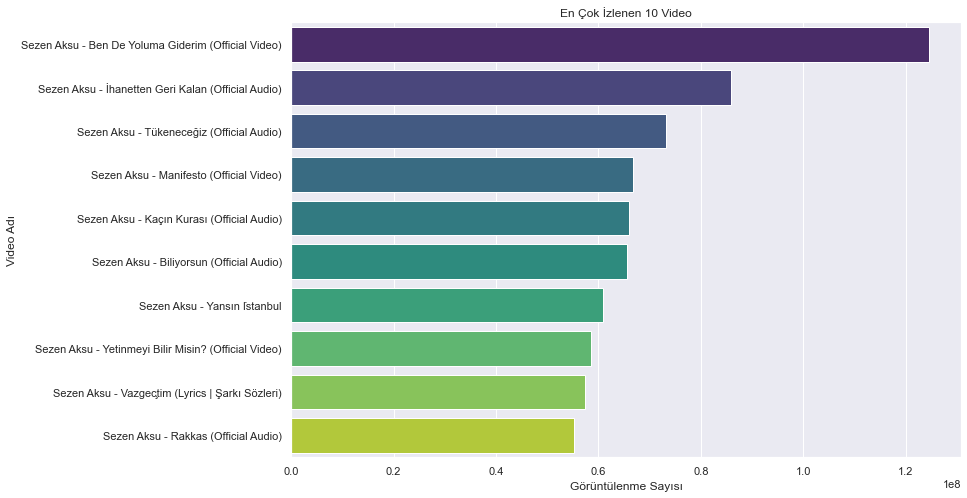

In [115]:
# En Ã§ok izlenen 10 videoya ait DataFrame'i kullanarak Ã§ubuk grafik oluÅŸturalÄ±m
sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='viewCount', y='title', data=top_10_viewed_video_df, palette='viridis')

plt.xlabel("GÃ¶rÃ¼ntÃ¼lenme SayÄ±sÄ±")
plt.ylabel("Video AdÄ±")
plt.title("En Ã‡ok Ä°zlenen 10 Video")
plt.show()

Kanal'Ä±n en Ã§ok beÄŸeni alan videolarÄ±

In [116]:
most_liked = video_details.loc[video_details['likeCount'].astype(float).idxmax()]

In [117]:
most_liked_video_info = most_liked[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

In [118]:
most_liked_video_df = pd.DataFrame([most_liked_video_info])
most_liked_video_df.head()

video_id channelTitle  \
68  p4yxn8ZahPI   Sezen Aksu   

                                                title  \
68  Sezen Aksu - Ben De Yoluma Giderim (Official V...   

                                          description  \
68  "Bu haftaki Ã§alÄ±ÅŸmamÄ±z, fÄ±rÄ±ndan Ã§Ä±ktÄ±ktan son...   

                                                 tags           publishedAt  \
68  [sezen aksu, Turkish music, Turkish Pop Music,...  2020-02-20T20:30:04Z   

    viewCount likeCount  favouriteCount commentCount duration definition  \
68  124570135    646911               0        49330  PT3M44S         hd   

   caption  
68    true

In [119]:
# 'likeCount' sÃ¼tununu sayÄ±sal veri tÃ¼rÃ¼ne dÃ¶nÃ¼ÅŸtÃ¼relim
video_details['likeCount'] = pd.to_numeric(video_details['likeCount'], errors='coerce')

# NaN deÄŸerleri temizle
video_details = video_details.dropna(subset=['likeCount'])

# 'likeCount' sÃ¼tununa gÃ¶re DataFrame'i sÄ±rala ve en Ã§ok izlenen 10 videoyu seÃ§
top_10_liked = video_details.nlargest(10, 'likeCount')

# En Ã§ok beÄŸenilen 10 videoya ait bilgiler
top_10_liked_video_info = top_10_liked[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# top_10_viewed_video_info deÄŸiÅŸkeni artÄ±k en Ã§ok beÄŸenilen 10 videoya ait tÃ¼m bilgileri iÃ§erir
top_10_liked_video_df = pd.DataFrame(top_10_liked_video_info)
top_10_liked_video_df.head(5)

video_id channelTitle  \
68   p4yxn8ZahPI   Sezen Aksu   
69   uVaG7dvT91s   Sezen Aksu   
235  D-i77gTIEWM   Sezen Aksu   
213  6ywcf07KQZA   Sezen Aksu   
247  -aW8x1jTA2U   Sezen Aksu   

                                                 title  \
68   Sezen Aksu - Ben De Yoluma Giderim (Official V...   
69   Sezen Aksu - Yetinmeyi Bilir Misin? (Official ...   
235  Sezen Aksu - Ä°hanetten Geri Kalan (Official Au...   
213            Sezen Aksu - Manifesto (Official Video)   
247           Sezen Aksu - Biliyorsun (Official Audio)   

                                           description  \
68   "Bu haftaki Ã§alÄ±ÅŸmamÄ±z, fÄ±rÄ±ndan Ã§Ä±ktÄ±ktan son...   
69   "Bu ÅŸarkÄ±nÄ±n bestecisi Serkan Ä°zzet Ã–zdoÄŸan. A...   
235  Biraz Pop Biraz Sezen - Ä°hanetten Geri Kalan \...   
213  Manifesto (Biraz Pop Biraz Sezen, 2017) \n\n#l...   
247  Hayat bazen Ã¶yle insafsÄ±z ki \nKÃ¼Ã§Ã¼k bir boÅŸlu...   

                                                  tags           publishedAt  \
68   [sezen aksu, Turkish music, Turkish Pop Music,...  2020-02-20T20:30:04Z   
69   [sezen aksu, Turkish music, Turkish Pop Music,...  2020-01-16T21:00:04Z   
235  [sezen aksu, YENÄ° ALBÃœM, SEZEN AKSU YENÄ°, SEZE...  2017-01-23T18:45:19Z   
213  [sezen aksu, manifesto, sezen aksu manifesto, ...  2017-05-27T08:00:20Z   
247  [sezen aksu, Biliyorsun, AÄŸlamak GÃ¼zeldir, Sez...  2016-12-26T06:29:53Z   

     viewCount  likeCount  favouriteCount commentCount duration definition  \
68   124570135     646911               0        49330  PT3M44S         hd   
69    58506160     450310               0        19802  PT2M59S         hd   
235   85830803     341228               0        17376  PT3M57S         hd   
213   66714620     337036               0        30940  PT3M31S         hd   
247   65600913     301040               0        12396  PT5M17S         hd   

    caption  
68     true  
69     true  
235   false  
213    true  
247   false

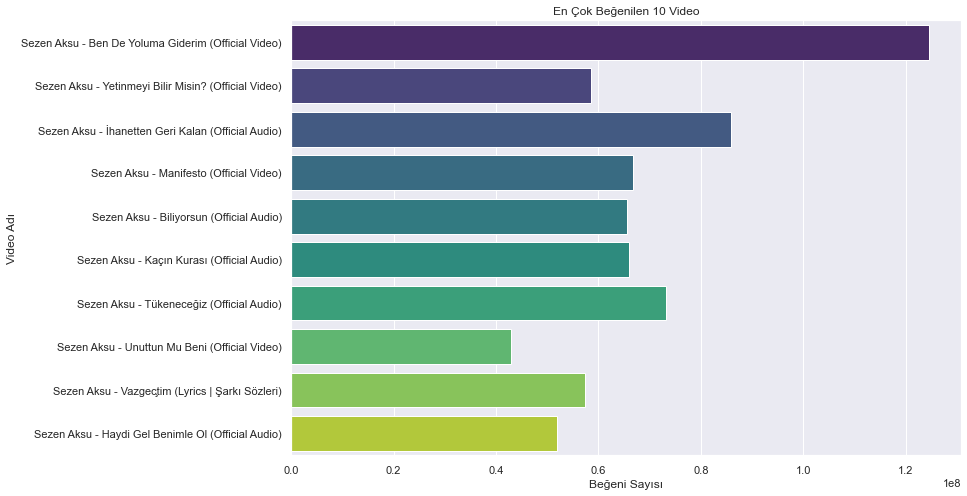

In [120]:
# En Ã§ok beÄŸenilen 10 videoya ait DataFrame'i kullanarak Ã§ubuk grafik oluÅŸtur
sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='viewCount', y='title', data=top_10_liked_video_df, palette='viridis')

# Grafik Ã¼zerine eklemeler
plt.xlabel("BeÄŸeni SayÄ±sÄ±")
plt.ylabel("Video AdÄ±")
plt.title("En Ã‡ok BeÄŸenilen 10 Video")
plt.show()

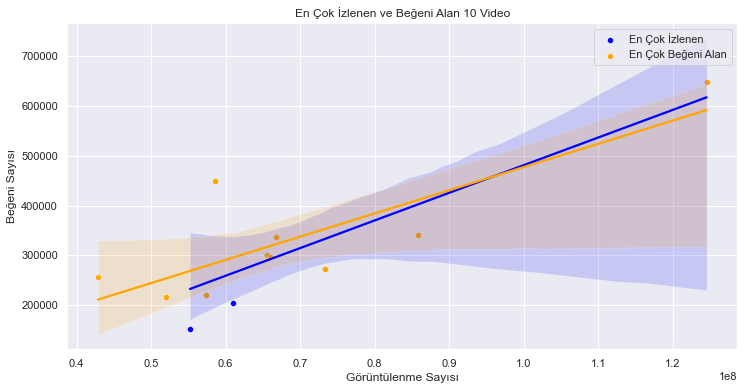

In [121]:
# En Ã§ok beÄŸeni alan ve en Ã§ok izlenen 10 videoyu seÃ§
top_10_likes = video_details.nlargest(10, 'likeCount')
top_10_views = video_details.nlargest(10, 'viewCount')

# Ã‡ift yÃ¶nlÃ¼ scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='viewCount', y='likeCount', data=top_10_views, color='blue', label='En Ã‡ok Ä°zlenen')
sns.scatterplot(x='viewCount', y='likeCount', data=top_10_likes, color='orange', label='En Ã‡ok BeÄŸeni Alan')

# Regresyon Ã§izgisi ekle
sns.regplot(x='viewCount', y='likeCount', data=top_10_views, scatter=False, color='blue')
sns.regplot(x='viewCount', y='likeCount', data=top_10_likes, scatter=False, color='orange')

# Grafik Ã¼zerine eklemeler
plt.xlabel('GÃ¶rÃ¼ntÃ¼lenme SayÄ±sÄ±')
plt.ylabel('BeÄŸeni SayÄ±sÄ±')
plt.title('En Ã‡ok Ä°zlenen ve BeÄŸeni Alan 10 Video')
plt.legend()
plt.show()

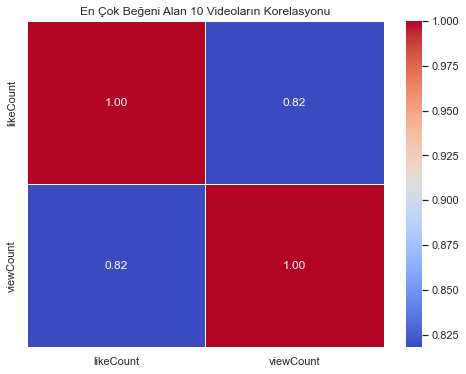

In [122]:
# En Ã§ok beÄŸeni alan ve en Ã§ok izlenen 10 videoyu seÃ§
top_10_likes = video_details.nlargest(10, 'likeCount')
top_10_views = video_details.nlargest(10, 'viewCount')

# SeÃ§ilen videolarÄ±n 'likeCount' ve 'viewCount' deÄŸiÅŸkenleri arasÄ±ndaki korelasyonu hesapla
correlation_matrix_likes = top_10_likes[['likeCount', 'viewCount']].corr()

# SeÃ§ilen videolarÄ±n 'likeCount' ve 'viewCount' deÄŸiÅŸkenleri arasÄ±ndaki korelasyonu Ä±sÄ± haritasÄ± ile gÃ¶rselleÅŸtir
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_likes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('En Ã‡ok BeÄŸeni Alan 10 VideolarÄ±n Korelasyonu')
plt.show()

Yorum : BeÄŸeni sayÄ±sÄ± ve izlenme sayÄ±sÄ± arasÄ±nda ki korelasyon katsayÄ±sÄ± aralarÄ±nda gÃ¼Ã§lÃ¼ bir iliÅŸki olduÄŸunu gÃ¶sterir.

In [123]:
# En Ã§ok izlenen videoya ait ID'yi liste iÃ§ine eklemek
most_viewed_video_id = most_viewed['video_id']

# most_viewed_video_id artÄ±k en Ã§ok izlenen videoya ait ID'yi iÃ§eren bir pandas Serisi
print(most_viewed_video_id)

p4yxn8ZahPI


In [124]:
# Video istatistiklerini almak iÃ§in API isteÄŸi oluÅŸturalÄ±m.
request = youtube.videos().list(
    part="snippet,statistics",
    id= most_viewed_video_id
)
response = request.execute()

# JSON formatÄ±nda Ã§Ä±ktÄ±yÄ± yazdÄ±ralÄ±m.
json.dumps(response, indent=2)

'{\n  "kind": "youtube#videoListResponse",\n  "etag": "m-EA-EKrrG_v-9hdA_z-PzhRZpQ",\n  "items": [\n    {\n      "kind": "youtube#video",\n      "etag": "6ILZBE3DKB8nrr0s1cWLIYzzRow",\n      "id": "p4yxn8ZahPI",\n      "snippet": {\n        "publishedAt": "2020-02-20T20:30:04Z",\n        "channelId": "UC6OI7Crv96jgra5pwJNDFRQ",\n        "title": "Sezen Aksu - Ben De Yoluma Giderim (Official Video)",\n        "description": "\\"Bu haftaki \\u00e7al\\u0131\\u015fmam\\u0131z, f\\u0131r\\u0131ndan \\u00e7\\u0131kt\\u0131ktan sonra biraz bekletilmi\\u015f yeni bir \\u015fark\\u0131.  \\u015e\\u00f6yle ki; \\u015fark\\u0131y\\u0131 size teslim ediyorum. \\u00d6zellikle de \\u00e7almaya, s\\u00f6ylemeye hevesli olanlar i\\u00e7in d\\u00fc\\u015f\\u00fcnd\\u00fcm bunu. Notas\\u0131 ve armonilerine a\\u015fa\\u011f\\u0131daki linkten ula\\u015fabilirsiniz. Buyurun size cover yerine, s\\u0131f\\u0131r \\u015fark\\u0131!\\n\\nKompozisyon Erman Arda\\u2019n\\u0131n. Fikir vermesi a\\u00e7\\u0131s\

In [125]:
video_info = response['items'][0]
title = video_info['snippet']['title']
published_at = video_info['snippet']['publishedAt']
view_count = video_info['statistics']['viewCount']
like_count = video_info['statistics']['likeCount']
favorite_count = video_info['statistics']['favoriteCount']
comment_count = video_info['statistics']['commentCount']

# Verileri DataFrame'e Ã§evirme
data = {
    "Video AdÄ±": [title],
    "YayÄ±n Tarihi": [published_at],
    "GÃ¶rÃ¼ntÃ¼lenme SayÄ±sÄ±": [view_count],
    "BeÄŸeni SayÄ±sÄ±": [like_count],
    "Favorilere Ekleme SayÄ±sÄ±": [favorite_count],
    "Yorum SayÄ±sÄ±": [comment_count]
}

video_df = pd.DataFrame(data)

In [126]:
video_df.head()

Video AdÄ±          YayÄ±n Tarihi  \
0  Sezen Aksu - Ben De Yoluma Giderim (Official V...  2020-02-20T20:30:04Z   

  GÃ¶rÃ¼ntÃ¼lenme SayÄ±sÄ± BeÄŸeni SayÄ±sÄ± Favorilere Ekleme SayÄ±sÄ± Yorum SayÄ±sÄ±  
0           124570135        646911                        0        49330

# Video hakkÄ±nda yapÄ±lan yorumlarÄ± inceliyoruz.

In [127]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId= most_viewed_video_id,
    maxResults=100  # maximum 100 yorum alabiliyoruz
)
response = request.execute()

In [128]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId= most_viewed_video_id,
    maxResults=10  # maximum 100 yorum alabiliyoruz
)
response = request.execute()

comment = [item['snippet']['topLevelComment']['snippet']['textDisplay'] for item in response['items']]
for item in comment:
    print(item)

ben de yoluma giderim artÄ±k :(
Ezdirmem kendimii
Bence hayatan daha Ã§ok insanlar Ã¼zÃ¼yorlar ðŸ˜”ðŸ˜”
Insanlarin agzindan cikan sozlerine inanmayin ! Ã‡Ã¼nkÃ¼  o sozlerin yalan oldugunu birgun kanitlarlar size , hemde en aci halde. ( sende ÅŸerefsizlik lakabini kendine takip gittin. Umarim beter olursun mehso / ederinle kal ÅŸarkinla birlikte ðŸ‘‹bY
Vay be erkeklerin yorumlarÄ±na bakÄ±yorum da kadinlardan daha aci cekmis bende bir erkek icin oturup aÄŸlÄ±yorum asla degmezmis bugun 15 gun sonra mesaj attim bir bahaneyle bana kimsiniz dedi ðŸ˜” vay bee sen otur agla adam mesajima kimsiniz desin ðŸ˜¢ðŸ˜¢ bu adalet miiiiiii
BoÅŸluktayÄ±m... paramparÃ§a..
AnladÄ±m ki sonu yok yalnÄ±zlÄ±ÄŸÄ±n<br>Ben bu dÃ¼nya da acÄ±lar iÃ§in varÄ±m<br>BazÄ± kullara keder kader olurmuÅŸ<br>Ne yazÄ±k ki ben de onlar arasÄ±ndayÄ±m<br><br>GÃ¶zÃ¼m kaydÄ± aydÄ±nlÄ±ÄŸa bir an<br>AklÄ±m kaldÄ± orda daha da Ã§Ä±kamam<br>BazÄ± kullarÄ±nÄ± terkeder tanrÄ± acÄ±madan<br>HiÃ§bir sevapla da kurtarÄ±lamayan<br><br>Yok bÄ

In [129]:
comments_data = []

for item in response['items']:
    comment_text = item['snippet']['topLevelComment']['snippet']['textDisplay']
    like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
    comments_data.append({'text': comment_text, 'like_count': like_count})

# DataFrame oluÅŸtur
df_comments = pd.DataFrame(comments_data)

# BeÄŸeni sayÄ±sÄ±na gÃ¶re bÃ¼yÃ¼kten kÃ¼Ã§Ã¼ÄŸe sÄ±rala
df_comments_sorted = df_comments.sort_values(by='like_count', ascending=False)
# Ä°lk 10 yorumu seÃ§
top_10_comments = df_comments_sorted.head(10)
# SÄ±ralanmÄ±ÅŸ DataFrame'i ekrana yazdÄ±r
top_10_comments

text  like_count
9  &quot;Bende yoluma giderim ezdirmem kendimi am...          14
7           Bu ÅŸarkÄ± yÃ¼zÃ¼nden sigarayÄ± bÄ±rakamÄ±yorum           8
8                          tutamam tutamam gideni...           4
4  Vay be erkeklerin yorumlarÄ±na bakÄ±yorum da kad...           3
5                        BoÅŸluktayÄ±m... paramparÃ§a..           3
2       Bence hayatan daha Ã§ok insanlar Ã¼zÃ¼yorlar ðŸ˜”ðŸ˜”           2
6  AnladÄ±m ki sonu yok yalnÄ±zlÄ±ÄŸÄ±n<br>Ben bu dÃ¼ny...           2
1                                  Ezdirmem kendimii           1
3  Insanlarin agzindan cikan sozlerine inanmayin ...           1
0                     ben de yoluma giderim artÄ±k :(           0